## 2. Ensemble(앙상블)
- 여러개의 분류기(Classifier)를 생성하고, 그 예측을 "결합"함으로써 보다 정확한 최종 예측을 도출함.

### 앙상블 학습 유형으로는
- 1. 보팅(Voting) - 하드 보팅(예측된 다수의 클래스 선택) / 소프트 보팅(평균 확률값이 큰 클래스 선택)
- 2. 배깅(Bagging) - 랜덤 포레스트(rf)
- 3. 부스팅(Boosting) - GBM, Xgboost, LightGBM 등
- 4. 스태킹(Stacking)
###### 요즘 가장 인기있는 것은 부스팅과 스태킹!


### 1) 보팅 분류기(Voting Classifier)
- 분류기에 다른 ML 알고리즘 적용 : 하드 보팅(예측된 다수의 클래스 선택) / 소프트 보팅(평균 확률값이 큰 클래스 선택)

#### VotingClassifier(estimator, voting) #voting 종류는 soft or hard

In [3]:
#위스콘신 유방암 데이터 세트를 예측 분석해보자.
## 여기서 원본 입력 데이터는 같게, ML 모델로는 kNN과 로지스틱을 사용.
from sklearn.datasets import load_breast_cancer
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###### 잊지말자!
- pd.read_csv('file.csv', header, names) 에서는 names=
- pd.DataFrame(바꿀것, columns) 에서는 columns= // df.rename(columns={old:new}) 도 columns

In [6]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns= cancer.feature_names) #name 아니고 columns
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#ML 모델로는 kNN과 로지스틱을 사용.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#보팅 분류기 만듦(소프트 보팅 기반)
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

#train/test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, random_state=156)

In [10]:
#학습
vo_clf.fit(X_train, y_train)
#예측
pred = vo_clf.predict(X_test)
############평가 - knn과 로지스틱 둘을 결합한 앙상블 모델의 정확도
print('(앙상블)보팅 분류기 정확도: {0:.3f}'.format(accuracy_score(pred,y_test)))

(앙상블)보팅 분류기 정확도: 0.956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#개별 모델의 학습, 예측, 평가
classifier = [lr_clf, knn_clf]
for c in classifier:
    c.fit(X_train,y_train)
    pred = c.predict(X_test)
    class_name = c.__class__.__name__ #class_name을 안만들고 그냥 밑 print 안에 c를 넣으면 다른 정보들까지(파라미터정보) 같이 나옴. 이름만 출력!
    print('{0} 분류기 정확도: {1:.3f}'.format(class_name, accuracy_score(pred,y_test)))

LogisticRegression 분류기 정확도: 0.947
KNeighborsClassifier 분류기 정확도: 0.939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 개별 분류기만 사용하는 것보다 이거 둘을 결합한 앙상블 분류기가 더 성능이 good.

### 2) 배깅-랜덤 포레스트
- 모두 같은 ML 알고리즘(보통 "결정 트리")이나, 원본 학습 데이터를 붓스트랩하여 서브셋을 다양하게 만들고, 보팅하는 방식 
- ==>이걸 다 할필욘 없고, randomforsetclassifier() 클래스를 이미 제공하고 있으므로 그냥 이거 하나만 쓰면 됨!

#### RandomFroestClassifier() :하이퍼 파라미터는 결정트리와 거의 동일!

In [13]:
#04-1의 사용자 행동 인식 데이터셋 사용
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
feature = pd.read_csv('04/human_activity/features.txt', sep='\s+', header=None, names=['col_index','feature_name'])
feature.head()

,col_index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [19]:
feature_name = feature['feature_name'].tolist()

In [21]:
X_train = pd.read_csv('04/human_activity/train/X_train.txt', sep='\s+', header=None, names= feature_name)
y_train = pd.read_csv('04/human_activity/train/y_train.txt', sep='\s+', header=None, names= ['label'])
X_test = pd.read_csv('04/human_activity/test/X_test.txt', sep='\s+', header=None, names= feature_name)
y_test = pd.read_csv('04/human_activity/test/y_test.txt', sep='\s+', header=None, names= ['label'])

X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


- RandomForestClassifier() 객체 생성

In [24]:
#객체
rf_clf = RandomForestClassifier(random_state=0)
#학습
rf_clf.fit(X_train,y_train)
#예측
pred = rf_clf.predict(X_test)
#평가
acc = accuracy_score(y_test,pred)
print('랜덤 포레스트의 정확도 : {0:.3f}'.format(acc))

랜덤 포레스트의 정확도 : 0.911


##### 하이퍼 파라미터 튜닝 - GridSearchCV를 이용!
- RandomForestClassifier(n_estimators, max_features, max_depth, min_samples_leaf)

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

In [26]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1) #n_jobs=-1을 넣으면 연산 속도가 빨라짐(근데 이건 노트북이라 효과가 없는듯..)
#gridseachcv
rf_grid = GridSearchCV(rf_clf, params, cv=2, refit=True, n_jobs=-1) #scoring='accuracy'를 넣지 않아도 나오긴 함
#학습
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100], 'max_depth': [6, 8, 10, 12], 'min_samples_leaf': [8, 12, 18], 'min_samples_split': [8, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
#cv 결과
print('최적의 하이퍼 파라미터: ',rf_grid.best_params_)
print('최고 예측 정확도: {0:.3f}'.format(rf_grid.best_score_))

최적의 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.917


In [29]:
#반환된 최적의 하이퍼 파라미터를 사용하되, n_estimators=300으로 늘리기
##사실 위에 나온 estimator를 그대로 출력해도 되긴한데(refit=True니까), n_estimator가 100으로 되어있는 상태이므로 걍 새로 만듦.
rf_clf2 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
#학습
rf_clf2.fit(X_train,y_train)
#예측
pred = rf_clf2.predict(X_test)
#평가 결과(정확도)
acc = accuracy_score(y_test,pred)

print('예측 정확도: {0:.3f}'.format(acc))

예측 정확도: 0.917


- 모델.feature_importances_ 시각화

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
ftr_import_values = rf_clf2.feature_importances_ #피처네임이 없음!! 숫자 array만 나오므로 변경필요
ftr_import = pd.Series(ftr_import_values, index=X_train.columns) #시리즈는 데이터프레임 한 열을 뗀것, "값과 index값"이 있음.
 
#피처 너무 많으므로 top20만 뽑기(내림차순)
ftr_top20 = ftr_import.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-min()-X                0.032487
tGravityAcc-mean()-Y               0.030986
tGravityAcc-min()-Y                0.029188
angle(X,gravityMean)               0.029071
angle(Y,gravityMean)               0.029033
tGravityAcc-energy()-X             0.028219
tGravityAcc-max()-X                0.027648
tGravityAcc-mean()-X               0.027126
tGravityAcc-max()-Y                0.024552
tGravityAcc-energy()-Y             0.015663
fBodyAccJerk-bandsEnergy()-1,8     0.014605
tGravityAcc-max()-Z                0.012352
tGravityAcc-arCoeff()-Z,2          0.011623
fBodyAccMag-mad()                  0.010764
angle(Z,gravityMean)               0.010431
tGravityAcc-arCoeff()-Y,1          0.010140
fBodyAccJerk-bandsEnergy()-1,16    0.010058
fBodyAccMag-energy()               0.009471
tGravityAcc-mean()-Z               0.009270
tGravityAcc-arCoeff()-Z,1          0.009110
dtype: float64

In [32]:
type(ftr_top20)

pandas.core.series.Series

In [33]:
ftr_top20.index

Index(['tGravityAcc-min()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y',
       'angle(X,gravityMean)', 'angle(Y,gravityMean)',
       'tGravityAcc-energy()-X', 'tGravityAcc-max()-X', 'tGravityAcc-mean()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-energy()-Y',
       'fBodyAccJerk-bandsEnergy()-1,8', 'tGravityAcc-max()-Z',
       'tGravityAcc-arCoeff()-Z,2', 'fBodyAccMag-mad()',
       'angle(Z,gravityMean)', 'tGravityAcc-arCoeff()-Y,1',
       'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccMag-energy()',
       'tGravityAcc-mean()-Z', 'tGravityAcc-arCoeff()-Z,1'],
      dtype='object')

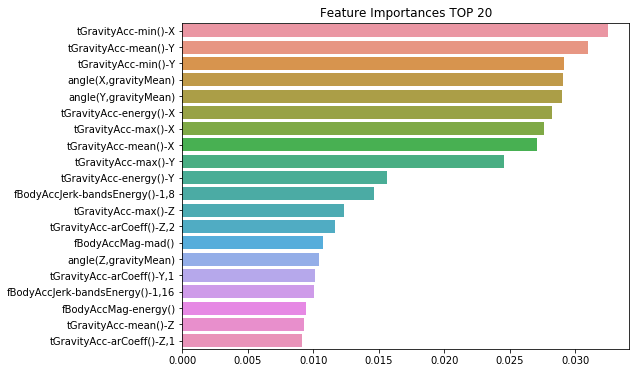

In [35]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances TOP 20')
sns.barplot(ftr_top20, ftr_top20.index)
plt.show()

### 3) 부스팅 - GBM(Gradient Boosting)
- 확률적 경사 하강법을 이용해, "실제값-예측값" 을 최소화함.
- 여러 개의 분류기를 순차적으로 학습하면서, 틀린 "오류 값"에 가중치를 부여함.(그 다음번 학습 시에는 틀릴 가능성을 낮춤.)

#### GradientBoostingClassifier()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [38]:
#앞에서 train, test 셋 이미 다 만들었음(2)랜덤포레스트떄)

#GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time() #이거 수행 시작 시 시간

#객체
gb_clf = GradientBoostingClassifier(random_state=0)
#학습
gb_clf.fit(X_train,y_train)
#예측
pred = gb_clf.predict(X_test)
#평가
acc = accuracy_score(pred, y_test)

print('GBM 정확도: {0:.3f}'.format(acc))
print('GBM 수행시간: {0:.1f}초'.format(time.time()-start_time))

GBM 정확도: 0.938
GBM 수행시간: 265.3초


### GBM 하이퍼 파라미터 튜닝
#### GradientBoostingClassifier(loss, learning_rate, n_estimators, subsample)

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,500], 'learning_rate':[0.05, 0.1]}

In [40]:
#그리드서치
gb_grid = GridSearchCV(gb_clf, params, cv=2, scoring='accuracy', refit=True, verbose=1) 
#verbose: integer값. 상세도를 조정함. 더 숫자값을 늘릴수록, 더 출력되는 메세지가 많아짐(상세해짐)

#학습
gb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 26.6min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 500], 'learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [41]:
#cv 결과
print('최적의 하이퍼 파라미터는 : ', gb_grid.best_params_)
print('최적의 하이퍼 파라미터의 예측 정확도는 : {0:.4f}'.format(gb_grid.best_score_))

최적의 하이퍼 파라미터는 :  {'learning_rate': 0.05, 'n_estimators': 500}
최적의 하이퍼 파라미터의 예측 정확도는 : 0.9010


In [42]:
#예측
estimator = gb_grid.best_estimator_ #앞의 최적의 파라미터로 자동 학습된 estimator
pred = estimator.predict(X_test)
#평가(정확도)
gb_acc = accuracy_score(pred, y_test)
print('GBM 정확도: {0:.4f}'.format(gb_acc))

GBM 정확도: 0.9410
